In [1]:
############################################################
# Plots of meta-stable Maxwell loops
# Inspired by https://doi.org/10.1134/S0036024406040030
# Math tricks taken from: http://math.stackexchange.com/q/416823/92706
# Plot also shown on page 79 of https://doi.org/10.15480/882.1207
############################################################

# load some bits and pieces
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.rcsetup as rcsetup

import CoolProp as CP
from CoolProp.CoolProp import PropsSI

# Check: CoolProp version
print(CP.__version__)
print(CP.__gitrevision__)
#print(rcsetup.all_backends)

# Constants
eps = 1e-3
kilo = 1e3
Mega = 1e6
golden = (1 + 5 ** 0.5) / 2
width = 12.5

6.1.1dev
6d076f9a634cd4b0991d075bb6aa0c0aa29ed8dd


In [6]:
# Calculation of the coefficients for the metastable region interpolation happens in this cell

# Set FluidName
FluidName = 'CO2'

# Constants, triple and critical data
R = PropsSI('GAS_CONSTANT',FluidName)
MM = PropsSI('MOLAR_MASS',FluidName)
Rs = R/MM
T_crt = PropsSI('T_CRITICAL',FluidName)
T_trp = PropsSI('T_TRIPLE',FluidName)
T_max = PropsSI('T_MAX',FluidName)
p_crt = PropsSI('P_CRITICAL',FluidName)
p_trp = PropsSI('P_TRIPLE',FluidName)
p_max = PropsSI('P_MAX',FluidName)
d_crt = PropsSI('RHOMASS_CRITICAL',FluidName)
v_crt = 1/d_crt
d_trp_liq = PropsSI('D','T',T_trp,'Q',0,FluidName)
d_trp_vap = PropsSI('D','T',T_trp,'Q',1,FluidName)
print("R = " + str(R))
print("MM = " + str(MM))
print("Rs = " + str(Rs))
print("T_crt = " + str(T_crt))
print("T_trp = " + str(T_trp))
print("p_crt = " + str(p_crt))
print("p_trp = " + str(p_trp))

R = 8.31451
MM = 0.0440098
Rs = 188.92405782348476
T_crt = 304.1282
T_trp = 216.592
p_crt = 7377300.0
p_trp = 517964.34344772575


In [22]:
nPoints = 1000

p_ideal = p_trp+eps
T = np.linspace(T_trp+5, T_max, num=nPoints)
cp0s = np.empty(nPoints)
H0s = np.empty(nPoints)

AS = CP.AbstractState("HEOS", FluidName)
for idx in range(0,nPoints):
    # update states
    AS.update(CP.PT_INPUTS, p_ideal, T[idx]) 
    cp0s[idx] = AS.cp0mass()
    H0s[idx] = AS.hmass()

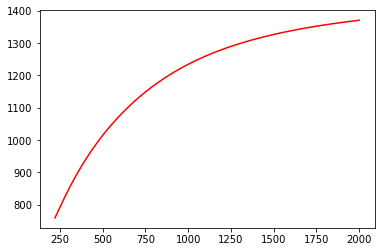

In [18]:
plt.plot(T, cp0s, color='red')
plt.show()

In [47]:
# https://math.stackexchange.com/q/1593871/92706
# https://scholar.google.com/scholar_lookup?doi=10.1016/0378-3812%2881%2985002-9

# coeffs for Carbondioxide
A = -7460.81
B = 7.54056
C = 7.51625
D = 1442.70
E = 5.38023
F = 647.502
G = 6.25230

def coth(x):
    import numpy as np
    return np.cosh(x)/np.sinh(x)

def arccoth(x):
    import numpy as np
    return np.arctanh(1/x)

# equation 12 from the paper
HT0 = B*T + C*T*(D/T)*coth(D/T) + E*T*(F/T)*np.tanh(F/T) + A

# T cancels out
CD = C*D
EF = E*F
HT1 = B*T + CD*coth(D/T) + EF*np.tanh(F/T) + A

# use inverse temperature
Tinv = 1/T
HT2 = B/Tinv + C*D*coth(D*Tinv) + E*F*np.tanh(F*Tinv) + A

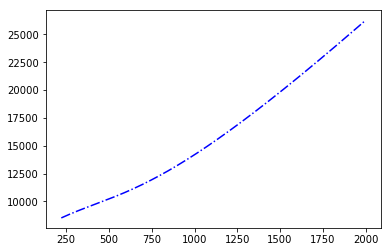

In [48]:
# plot all three variants HT0, HT1 and HT2 to be sure they are identical
# plt.plot(T, HT0, color='red')
plt.plot(T, HT2, color='blue', linestyle='-.')
plt.show()

In [49]:
H = HT0
TinvH = H/B + 1/D*arccoth(H/CD) + 1/F*np.arctanh(H/EF)

C:\Users\mthorade\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in arctanh
C:\Users\mthorade\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in arctanh
  
